In [1]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data_gen import *
from predict_info import *

import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Conv1D, Conv1DTranspose, MaxPooling1D, UpSampling1D, Normalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, confusion_matrix

In [2]:
X, y, df = data_gen(N_data=500000)
# N_data=100000,N_tu=256,x0=(64, 196),w=(5,15),A=(1,20),bkg=(1,15)

NameError: name 'N_tu' is not defined

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Autoencoder

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256)]             0         
                                                                 
 normalization_1 (Normalizat  (None, 256)              513       
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 64)                576       
                                                           

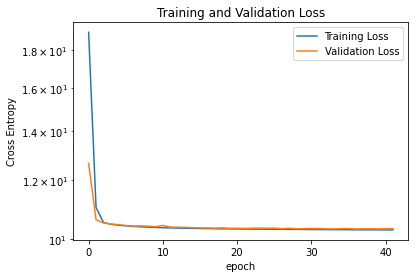

In [5]:
array = Input(shape=(256,))
norm = Normalization()(array)
x = Dense(128, activation="relu")(norm)
x = Dense(64, activation="relu")(x)
x = Dense(8, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)
decoded = Dense(256, activation="relu")(x)

autoencoder = Model(array, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001),
             loss='mean_squared_error')

callback_conv = [EarlyStopping(monitor='val_loss', patience=5),
               TensorBoard(log_dir = "./logs/auto/{}-{}-{}-{}".format(datetime.datetime.today().month,
                                                                      datetime.datetime.today().day,
                                                                      datetime.datetime.today().hour,
                                                                      datetime.datetime.today().minute), update_freq="epoch")
]
autoencoder.summary()

history = autoencoder.fit(X_train, X_train,
          validation_data = (X_test, X_test),
          batch_size=64, epochs=100, callbacks=[callback_conv])


loss = history.history['loss']
val_loss = history.history['val_loss']


plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.show()

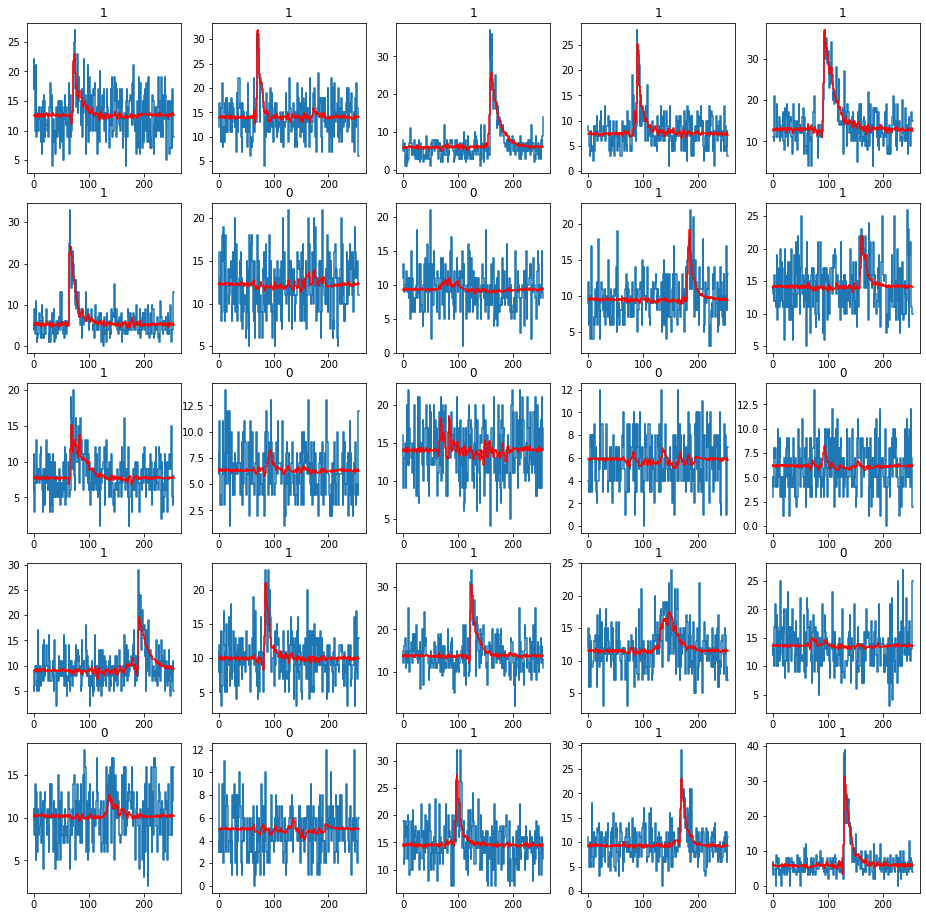

In [6]:
X_pred = autoencoder.predict(X_test)
x = np.arange(256)
fig, axs = plt.subplots(5,5,figsize=(16,16))

for i in range(5):
    for j in range(5):
        ind = np.random.randint(len(y_test))
        axs[i,j].set_title(y_test[ind])
        axs[i,j].step(x,X_test[ind])
        axs[i,j].step(x,X_pred[ind],color="red");

In [7]:
#autoencoder.save("autoencoder_dense_2")

INFO:tensorflow:Assets written to: autoencoder_dense_2\assets
